# KMeans Hands-on for Cricket Dataset

### Import the basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import the dataset

In [2]:
df = pd.read_csv("Cricket.csv", encoding='latin1')

### Basic pandas methods


In [3]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [4]:
df.shape

(79, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [6]:
df.describe()

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,245.075949,230.544304,30.037975,7618.139241,38.523291,9684.455696,79.295316,11.556962,46.443038,13.253165
std,74.211716,70.321022,14.421710,2551.873313,5.919093,3193.835825,9.925307,8.092014,16.351701,5.925755
min,128.000000,127.000000,4.000000,5080.000000,23.570000,5504.000000,60.570000,0.000000,23.000000,3.000000
25%,188.000000,177.000000,17.500000,5759.000000,34.600000,7393.500000,73.725000,6.000000,34.500000,9.000000
50%,232.000000,217.000000,29.000000,6798.000000,37.870000,9134.000000,77.730000,10.000000,42.000000,13.000000
75%,281.500000,261.500000,40.000000,8739.500000,41.845000,10976.000000,85.180000,15.500000,54.000000,16.000000
max,463.000000,452.000000,70.000000,18426.000000,53.940000,21367.000000,117.000000,49.000000,96.000000,34.000000


In [7]:
df.isnull().sum()

Player    0
Span      0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
dtype: int64

In [8]:
# to convert the span into years of experience
# we first split the span into start and end and store in new column

In [9]:
df[['Strt','End']] = df.Span.str.split("-",expand=True) 

In [10]:
# convert them as int and
# find years of exp as end year - start year
# later drop the unneceassry columns such as start, end and span
# we are only left with the experience column now

In [11]:
df[['Strt','End']]=df[['Strt','End']].astype(int)
df['Exp']=df['End']-df['Strt']
df=df.drop(['Strt','End','Span'], axis = 1) 
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


### Check for outliers

In [12]:
df.HS=df.HS.str.extract('(\d+)')
df.HS=df.HS.astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Mat     79 non-null     int64  
 2   Inns    79 non-null     int64  
 3   NO      79 non-null     int64  
 4   Runs    79 non-null     int64  
 5   HS      79 non-null     int32  
 6   Ave     79 non-null     float64
 7   BF      79 non-null     int64  
 8   SR      79 non-null     float64
 9   100     79 non-null     int64  
 10  50      79 non-null     int64  
 11  0       79 non-null     int64  
 12  Exp     79 non-null     int32  
dtypes: float64(2), int32(2), int64(8), object(1)
memory usage: 7.5+ KB


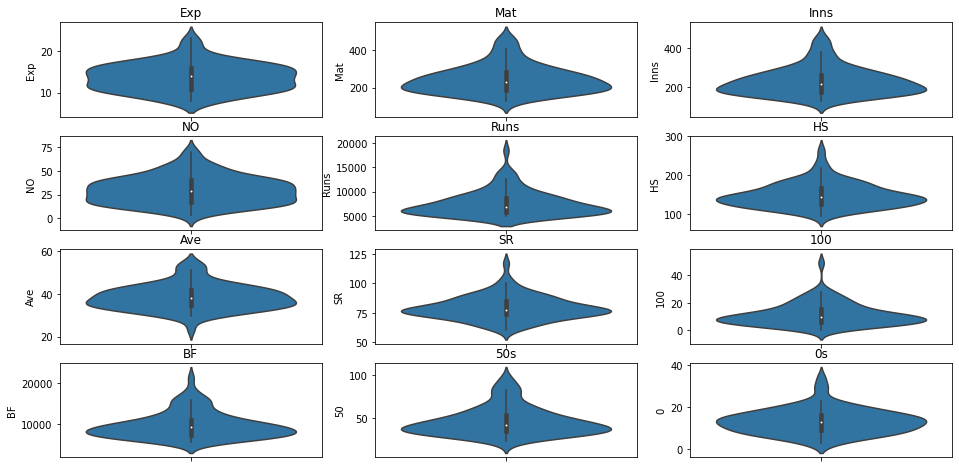

In [14]:
f, axes = plt.subplots(4,3, figsize=(16, 8))
s=sns.violinplot(y=df.Exp,ax=axes[0, 0])
axes[0, 0].set_title('Exp')
s=sns.violinplot(y=df.Mat,ax=axes[0, 1])
axes[0, 1].set_title('Mat')
s=sns.violinplot(y=df.Inns,ax=axes[0, 2])
axes[0, 2].set_title('Inns')

s=sns.violinplot(y=df.NO,ax=axes[1, 0])
axes[1, 0].set_title('NO')
s=sns.violinplot(y=df.Runs,ax=axes[1, 1])
axes[1, 1].set_title('Runs')
s=sns.violinplot(y=df.HS,ax=axes[1, 2])
axes[1, 2].set_title('HS')

s=sns.violinplot(y=df.Ave,ax=axes[2, 0])
axes[2, 0].set_title('Ave')
s=sns.violinplot(y=df.SR,ax=axes[2, 1])
axes[2, 1].set_title('SR')
s=sns.violinplot(y=df['100'],ax=axes[2, 2])
axes[2, 2].set_title('100')
s=sns.violinplot(y=df.BF,ax=axes[3, 0])
axes[3, 0].set_title('BF')
s=sns.violinplot(y=df['50'],ax=axes[3, 1])
axes[3, 1].set_title('50s')
s=sns.violinplot(y=df['0'],ax=axes[3, 2])
axes[3, 2].set_title('0s')
plt.show()

In [15]:
Q3 = df.Mat.quantile(0.99)
Q1 = df.Mat.quantile(0.01)
df['Mat'][df['Mat']<=Q1]=Q1
df['Mat'][df['Mat']>=Q3]=Q3

Q3 = df.Inns.quantile(0.99)
Q1 = df.Inns.quantile(0.01)
df['Inns'][df['Inns']<=Q1]=Q1
df['Inns'][df['Inns']>=Q3]=Q3

Q3 = df.NO.quantile(0.99)
Q1 = df.NO.quantile(0.01)
df['NO'][df['NO']<=Q1]=Q1
df['NO'][df['NO']>=Q3]=Q3

Q3 = df.Runs.quantile(0.99)
Q1 = df.Runs.quantile(0.01)
df['Runs'][df['Runs']<=Q1]=Q1
df['Runs'][df['Runs']>=Q3]=Q3

Q3 = df.HS.quantile(0.99)
Q1 = df.HS.quantile(0.01)
df['HS'][df['HS']<=Q1]=Q1
df['HS'][df['HS']>=Q3]=Q3

Q3 = df.Ave.quantile(0.99)
Q1 = df.Ave.quantile(0.01)
df['Ave'][df['Ave']<=Q1]=Q1
df['Ave'][df['Ave']>=Q3]=Q3

Q3 = df.BF.quantile(0.99)
Q1 = df.BF.quantile(0.01)
df['BF'][df['BF']<=Q1]=Q1
df['BF'][df['BF']>=Q3]=Q3

Q3 = df.SR.quantile(0.99)
Q1 = df.SR.quantile(0.01)
df['SR'][df['SR']<=Q1]=Q1
df['SR'][df['SR']>=Q3]=Q3

Q3 = df.Exp.quantile(0.99)
Q1 = df.Exp.quantile(0.01)
df['Exp'][df['Exp']<=Q1]=Q1
df['Exp'][df['Exp']>=Q3]=Q3

Q3 = df['100'].quantile(0.99)
Q1 = df['100'].quantile(0.01)
df['100'][df['100']<=Q1]=Q1
df['100'][df['100']>=Q3]=Q3

Q3 = df['50'].quantile(0.99)
Q1 = df['50'].quantile(0.01)
df['50'][df['50']<=Q1]=Q1
df['50'][df['50']>=Q3]=Q3

Q3 = df['0'].quantile(0.99)
Q1 = df['0'].quantile(0.01)
df['0'][df['0']<=Q1]=Q1
df['0'][df['0']>=Q3]=Q3



<ipython-input-15-1c42ba4325e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mat'][df['Mat']<=Q1]=Q1
<ipython-input-15-1c42ba4325e5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mat'][df['Mat']>=Q3]=Q3
<ipython-input-15-1c42ba4325e5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Inns'][df['Inns']<=Q1]=Q1
<ipython-input-15-1c42ba4325e5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

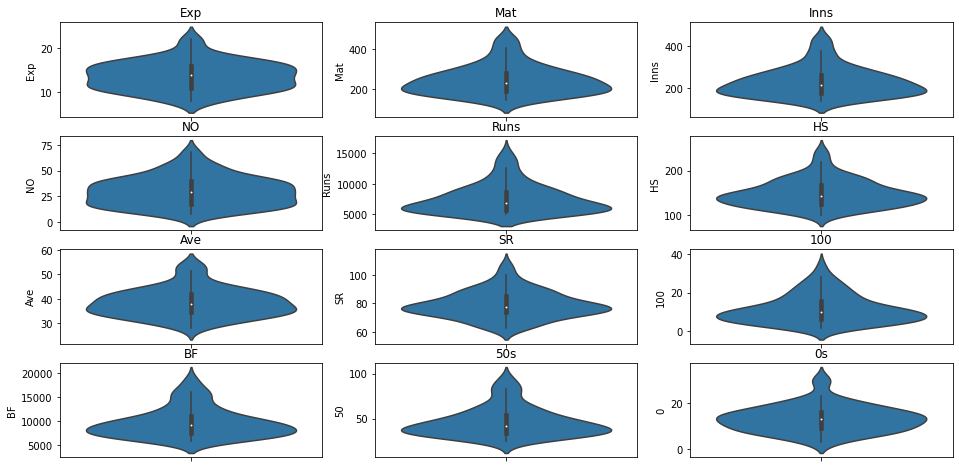

In [16]:
f, axes = plt.subplots(4,3, figsize=(16, 8))
s=sns.violinplot(y=df.Exp,ax=axes[0, 0])
axes[0, 0].set_title('Exp')
s=sns.violinplot(y=df.Mat,ax=axes[0, 1])
axes[0, 1].set_title('Mat')
s=sns.violinplot(y=df.Inns,ax=axes[0, 2])
axes[0, 2].set_title('Inns')

s=sns.violinplot(y=df.NO,ax=axes[1, 0])
axes[1, 0].set_title('NO')
s=sns.violinplot(y=df.Runs,ax=axes[1, 1])
axes[1, 1].set_title('Runs')
s=sns.violinplot(y=df.HS,ax=axes[1, 2])
axes[1, 2].set_title('HS')

s=sns.violinplot(y=df.Ave,ax=axes[2, 0])
axes[2, 0].set_title('Ave')
s=sns.violinplot(y=df.SR,ax=axes[2, 1])
axes[2, 1].set_title('SR')
s=sns.violinplot(y=df['100'],ax=axes[2, 2])
axes[2, 2].set_title('100')
s=sns.violinplot(y=df.BF,ax=axes[3, 0])
axes[3, 0].set_title('BF')
s=sns.violinplot(y=df['50'],ax=axes[3, 1])
axes[3, 1].set_title('50s')
s=sns.violinplot(y=df['0'],ax=axes[3, 2])
axes[3, 2].set_title('0s')
plt.show()

In [17]:
df_drop = df.copy()
player = df_drop.pop('Player')

In [18]:
df_drop.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,451.3,437.18,41.0,15156.24,200.0,44.83,18778.18,86.23,34.18,93.66,20.00,22.22
1,404.0,380.00,41.0,14234.00,169.0,41.98,18048.00,78.86,25.00,93.00,15.00,15.00
2,375.0,365.00,39.0,13704.00,164.0,42.03,17046.00,80.39,30.00,82.00,20.00,17.00
3,445.0,433.00,18.0,13430.00,189.0,32.36,14725.00,91.20,28.00,68.00,30.88,22.00
4,448.0,418.00,39.0,12650.00,144.0,33.37,16020.00,78.96,19.00,77.00,28.00,17.00


In [19]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_drop)
df_scaled

array([[ 2.82279967e+00,  2.99188395e+00,  7.72431175e-01,
         3.18356123e+00,  1.69403032e+00,  1.08826122e+00,
         2.98241352e+00,  7.49179671e-01,  3.13264038e+00,
         2.92935542e+00,  1.17861903e+00,  2.59980337e+00],
       [ 2.17526315e+00,  2.16409181e+00,  7.72431175e-01,
         2.79619505e+00,  6.63399607e-01,  5.92157985e-01,
         2.74368859e+00, -3.56865202e-02,  1.87083605e+00,
         2.88840881e+00,  3.10241582e-01,  3.87084249e-01],
       [ 1.77825344e+00,  1.94693753e+00,  6.31248299e-01,
         2.57358047e+00,  4.97168847e-01,  6.00861551e-01,
         2.41609488e+00,  1.27250423e-01,  2.55809331e+00,
         2.20596529e+00,  1.17861903e+00,  1.00002583e+00],
       [ 2.73655274e+00,  2.93137029e+00, -8.51171904e-01,
         2.45849293e+00,  1.32832265e+00, -1.08240802e+00,
         1.65726753e+00,  1.27845850e+00,  2.28319041e+00,
         1.33740082e+00,  3.06820835e+00,  2.53237980e+00],
       [ 2.77762271e+00,  2.71421601e+00,  6.3124829

In [21]:
df_df1 = pd.DataFrame(df_scaled, columns = [ 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100',
                                            '50', '0', 'Exp'])
df_df1.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,2.822800,2.991884,0.772431,3.183561,1.694030,1.088261,2.982414,0.749180,3.132640,2.929355,1.178619,2.599803
1,2.175263,2.164092,0.772431,2.796195,0.663400,0.592158,2.743689,-0.035687,1.870836,2.888409,0.310242,0.387084
2,1.778253,1.946938,0.631248,2.573580,0.497169,0.600862,2.416095,0.127250,2.558093,2.205965,1.178619,1.000026
3,2.736553,2.931370,-0.851172,2.458493,1.328323,-1.082408,1.657268,1.278458,2.283190,1.337401,3.068208,2.532380
4,2.777623,2.714216,0.631248,2.130871,-0.167754,-0.906596,2.080655,-0.025037,1.046127,1.895764,2.568023,1.000026


### Implementing KMeans

In [22]:
from sklearn.cluster import KMeans

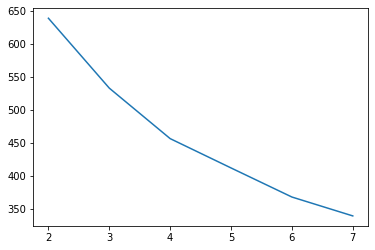

In [23]:
clusters=list(range(2,8))
wcss = []
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters)
    model_clus.fit(df_df1)
    wcss.append(model_clus.inertia_)

plt.plot(clusters,wcss);

In [24]:
cluster = KMeans(n_clusters=4)
cluster.fit(df_df1)

KMeans(n_clusters=4)

In [25]:
df['Cluster_Id'] = cluster.labels_
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_Id
0,SR Tendulkar (INDIA),451.3,437.18,41.0,15156.24,200.0,44.83,18778.18,86.23,34.18,93.66,20.00,22.22,1
1,KC Sangakkara (Asia/ICC/SL),404.0,380.00,41.0,14234.00,169.0,41.98,18048.00,78.86,25.00,93.00,15.00,15.00,1
2,RT Ponting (AUS/ICC),375.0,365.00,39.0,13704.00,164.0,42.03,17046.00,80.39,30.00,82.00,20.00,17.00,1
3,ST Jayasuriya (Asia/SL),445.0,433.00,18.0,13430.00,189.0,32.36,14725.00,91.20,28.00,68.00,30.88,22.00,1
4,DPMD Jayawardene (Asia/SL),448.0,418.00,39.0,12650.00,144.0,33.37,16020.00,78.96,19.00,77.00,28.00,17.00,1


In [38]:
df[df['Cluster_Id']==0].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False]).head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_Id
60,Tamim Iqbal (BDESH),173.00,171.00,7.9,5743.0,154.0,34.38,7333.0,78.31,9.0,38.0,16.0,10.0,0
37,GC Smith (Afr/SA),197.00,194.00,10.0,6989.0,141.0,37.98,8648.0,80.81,10.0,47.0,8.0,11.0,0
70,G Gambhir (INDIA),147.00,143.00,11.0,5238.0,150.0,39.68,6144.0,85.25,11.0,34.0,11.0,10.0,0
54,Mohammad Hafeez (PAK),190.00,190.00,12.0,5876.0,140.0,33.01,7774.0,75.58,11.0,32.0,16.0,14.0,0
74,CG Greenidge (WI),142.04,139.48,13.0,5134.0,133.0,45.03,7908.0,64.92,11.0,31.0,3.0,16.0,0


In [27]:
df[df['Cluster_Id']==1].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False]).head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_Id
3,ST Jayasuriya (Asia/SL),445.0,433.0,18.0,13430.0,189.0,32.36,14725.0,91.20,28.0,68.0,30.88,22.0,1
7,SC Ganguly (Asia/INDIA),311.0,300.0,23.0,11363.0,183.0,41.02,15416.0,73.70,22.0,72.0,16.00,15.0,1
2,RT Ponting (AUS/ICC),375.0,365.0,39.0,13704.0,164.0,42.03,17046.0,80.39,30.0,82.0,20.00,17.0,1
4,DPMD Jayawardene (Asia/SL),448.0,418.0,39.0,12650.0,144.0,33.37,16020.0,78.96,19.0,77.0,28.00,17.0,1
8,R Dravid (Asia/ICC/INDIA),344.0,318.0,40.0,10889.0,153.0,39.16,15284.0,71.24,12.0,83.0,13.00,15.0,1


In [28]:
df[df['Cluster_Id']==2].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False]).head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_Id
24,V Sehwag (Asia/ICC/INDIA),251.0,245.0,9.0,8273.0,219.0,35.05,7929.0,104.33,15.0,38.0,14.0,14.0,2
34,HM Amla (SA),156.0,153.0,10.0,7186.0,159.0,50.25,8069.0,89.05,25.0,33.0,3.0,9.0,2
12,AC Gilchrist (AUS/ICC),287.0,279.0,11.0,9619.0,172.0,35.89,9922.0,96.94,16.0,55.0,19.0,12.0,2
48,WU Tharanga (Asia/SL),204.0,193.0,14.0,6140.0,174.0,34.30,8183.0,75.03,14.0,34.0,15.0,12.0,2
49,ML Hayden (AUS/ICC),161.0,155.0,15.0,6133.0,181.0,43.80,7767.0,78.96,10.0,36.0,9.0,15.0,2


In [29]:
df[df['Cluster_Id']==3].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False]).head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_Id
43,GW Flower (ZIM),221.0,214.0,18.0,6571.0,142.0,33.5200,9723.0,67.5800,6.0,40.0,18.0,18.0,3
28,SP Fleming (ICC/NZ),280.0,269.0,21.0,8037.0,134.0,32.4000,11242.0,71.4900,8.0,49.0,17.0,13.0,3
33,Younis Khan (PAK),265.0,255.0,23.0,7249.0,144.0,31.2400,9628.0,75.2900,7.0,48.0,22.0,15.0,3
27,Shahid Afridi (Asia/ICC/PAK),398.0,369.0,27.0,8064.0,124.0,28.1876,6892.0,107.1174,6.0,39.0,30.0,19.0,3
21,DL Haynes (WI),238.0,237.0,28.0,8648.0,152.0,41.3700,13707.0,63.0900,17.0,57.0,13.0,16.0,3


In [31]:
df[df['Cluster_Id']==0].shape

(32, 14)

In [32]:
df[df['Cluster_Id']==1].shape

(9, 14)

In [33]:
df[df['Cluster_Id']==2].shape

(17, 14)

In [34]:
df[df['Cluster_Id']==3].shape

(21, 14)

In [4]:
a=10
b=10
a==b

True